In [37]:
import pandas as pd
from pandas import read_csv
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
url = 'C:\\Users\\2801123\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
dataset = pd.read_csv(url, names = names)

In [40]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,150.0,4.0,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0


In [41]:
dataset[0:1]

,sepal-length,sepal-width,petal-length,petal-width,class
0,150.0,4.0,setosa,versicolor,virginica


In [42]:
data = dataset[1:].copy().reset_index(drop=True)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
data['class'].unique()

array(['0', '1', '2'], dtype=object)

In [44]:
data.shape

(150, 5)

In [45]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [47]:
data.describe()

,sepal-length,sepal-width
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null object
petal-width     150 non-null object
class           150 non-null object
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [49]:
data['petal-length'] = data['petal-length'].astype('float')
data['petal-width'] = data['petal-width'].astype('float')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
dataset.groupby('class').size()

class
0            50
1            50
2            50
virginica     1
dtype: int64

[Text(0.5, 0, 'petal-width')]

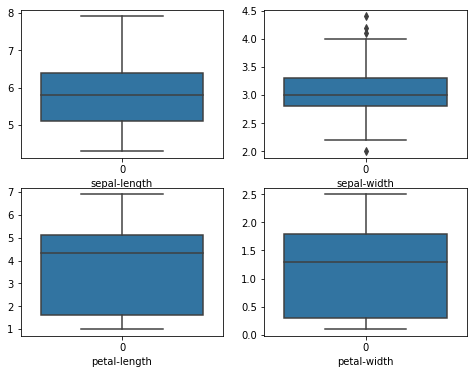

In [77]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6))
sns.boxplot(data=data[data.columns[0]],ax=ax1)
ax1.set(xlabel=data.columns[0])
sns.boxplot(data=data[data.columns[1]],ax=ax2)
ax2.set(xlabel=data.columns[1])
sns.boxplot(data=data[data.columns[2]],ax=ax3)
ax3.set(xlabel=data.columns[2])
sns.boxplot(data=data[data.columns[3]],ax=ax4)
ax4.set(xlabel=data.columns[3])

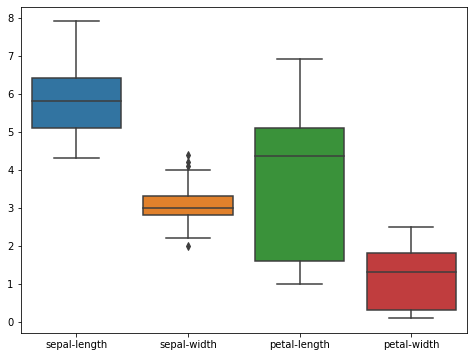

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data[data.columns[:4]])
plt.show()

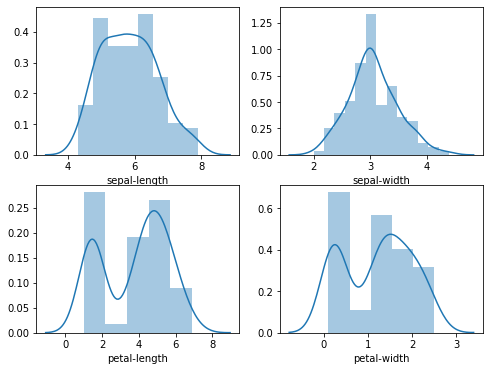

In [86]:
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(8,6))

sns.distplot(data[data.columns[0]],ax=ax0)
sns.distplot(data[data.columns[1]],ax=ax1)
sns.distplot(data[data.columns[2]],ax=ax2)
sns.distplot(data[data.columns[3]],ax=ax3)